# NAME - Sakshi Jain

# TASK 1 - Prediction using Supervised ML 

# 1. Importing Dataset 

In [15]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


In [2]:
#importing dataset 
data = pd.read_csv(r"C:\Users\Sakshi\Downloads\hours .csv")

In [29]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#looking if there's any null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Data consists of 2 columns Hours and Scores with No null values present in the data. 

In [5]:
#looking at values 
x = data['Hours'].values
x

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

In [7]:
y = data['Scores'].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [10]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# 2. Visual Presentation

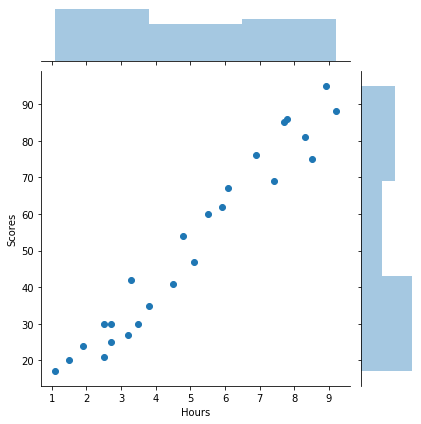

In [9]:
sns.jointplot(x = 'Hours', y = 'Scores', data = data, kind = 'scatter')

A positive linear relationship between no of hours and scores obtained. 

In [16]:
#To check numerically
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


A high positive correlation of 0.976191 is seen between the variables - 'Hours Studied' and 'Scores'. This validates the existence of linear relationship between them.

# 3. Distinguishing the Data

In [11]:
#Divide the data into dependent and independent variables
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [12]:
#Splitting the model into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.20, random_state =  0 )

In the above code, I splitted the data as 80:20 ratio of train:test where 80% is training and 20% is testing data. 

# 4. Training the Linear Regression algorithm

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()


In [18]:
reg.fit(x_train,y_train)
print('Training complete')

Training complete


Diagram Loaded Successfully


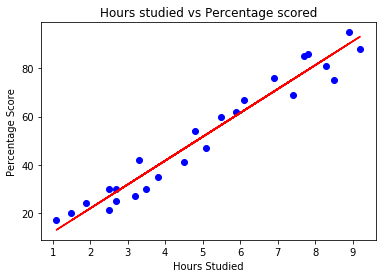

In [19]:
line = reg.coef_*x+reg.intercept_
# Plotting for the test data
plt.scatter(x, y, color = 'blue')
plt.plot(x, line, color='red')
plt.title('Hours studied vs Percentage scored')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
print('Diagram Loaded Successfully')
plt.show()

The line is the best fit line which the model analyzed based on the 80% of the data set that was allocated it. The line is of the form, Y = (Beta 1) + (Beta 2)*X which is nothing but the equation of a simple linear regression.

# 5. Testing the model

In [20]:
print(x_test) # Testing data - In Hours
y_pred = reg.predict(x_test) # Predicting Scores.

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
reg.coef_

array([9.91065648])

In [23]:
reg.intercept_

2.018160041434683

In [24]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


 Task - to predict the value of percentage scored when number of hours studied is 9.25 hours. 

In [26]:
#Comparing the actual and predicted value of 'Percentage Scored'
hours = [[9.25]]
pred_new = reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred_new[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


# 6. Evaluation of Model

In [28]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


The value of Root Mean Squared Error is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48%. This means the linear regression algorithm did work.